In [445]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn import linear_model 
import requests, re, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

df = pd.read_csv("C:/Users/pedrito/Downloads/articulo/IDH1.csv")
dff = pd.read_csv("C:/Users/pedrito/Downloads/articulo/IDH.csv")

In [ ]:
#Cargar los Datos

In [446]:
dff

,Country,1990,2000,2010,2014,2015,2017,2018,2019,2021
0,Chile,0.706,0.756,0.803,0.837,0.842,0.847,0.849,0.851,0.855
1,Cuba,0.680,0.691,0.781,0.767,0.772,0.777,0.781,0.783,0.764
2,Argentina,0.718,0.781,0.829,0.836,0.840,0.843,0.842,0.845,0.842
3,Uruguay,0.694,0.743,0.782,0.803,0.806,0.814,0.816,0.817,0.809
4,Panama,0.675,0.735,0.774,0.795,0.799,0.811,0.812,0.815,0.805
5,Venezuela,0.644,0.676,0.757,0.775,0.769,0.743,0.733,0.711,0.675
6,Costa Rica,0.665,0.721,0.765,0.796,0.797,0.804,0.808,0.810,0.809
7,Mexico,0.656,0.708,0.748,0.761,0.766,0.771,0.776,0.779,0.758
8,Brasil,0.613,0.685,0.727,0.756,0.756,0.761,0.762,0.765,0.754
9,Peru,0.613,0.679,0.721,0.760,0.759,0.767,0.771,0.777,0.762


In [ ]:
#Aplicar las variables regresoras 

In [447]:
X=df.iloc[:,1:len(df.columns)]
Y=df.iloc[:,0]

In [ ]:
#Aplicar el modelo de regression lineal s

In [448]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

regr= linear_model.LinearRegression()

resultados = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index,], X.loc[test_index,]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predicciones = regr.predict(X_test)
    print("R2: ", r2_score(y_test, predicciones))
    resultados.append(r2_score(y_test,predicciones))
    
print("R2 medio:" ,np.mean(resultados))    


R2:  0.9898185406719728
R2:  0.9164750680525352
R2:  0.9430499689427023
R2:  0.9815891123015867
R2:  0.787880611602968
R2:  0.9932212502199892
R2:  0.991424382529028
R2:  0.969199237912977
R2:  0.8825558764398201
R2:  0.9954097983393061
R2 medio: 0.9450623847012884


In [ ]:
#Aqui se puede ver la capacidade predictiva vemos que el modelo ajusta 

In [449]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicciones)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicciones)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

Mean Absolute Error: 0.004033842628874185
Mean Squared Error: 2.581988434140295e-05
Root Mean Squared Error: 0.005081327025630505


In [450]:
regr=linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [451]:
r2_score(Y, regr.predict(X))

0.9994763624535148

In [ ]:
#Aqui vamos usar los coeficientes de regression 

In [452]:
regr.coef_

array([ 1.85206112, -0.54951109, -0.16692546, -0.13480544,  0.05669144,
        0.0495805 , -0.10775512])

In [453]:
regr.intercept_

-0.010163755868125901

In [ ]:
#Aqui podemos ver la prediccion del IDH para la America Latina   

In [454]:
np.sum(df.iloc[:,0:7] * regr.coef_ ,axis = 1)

0     0.860478
1     0.794971
2     0.852688
3     0.824435
4     0.824386
5     0.694959
6     0.819881
7     0.788312
8     0.774248
9     0.790697
10    0.778495
11    0.763252
12    0.768841
13    0.736179
14    0.729577
15    0.680928
16    0.677283
17    0.642070
18    0.667459
19    0.517856
dtype: float64

In [455]:
fit=np.sum(df.iloc[:,0:7] * regr.coef_ ,axis = 1)

In [456]:
df.insert(0,"Prediccion", fit, allow_duplicates=False)

In [457]:
df1=df

In [ ]:
#Aqui podemos ver los datos de la prediccion 

In [458]:
df1


,Prediccion,2019,2018,2017,2015,2014,2010,2000,1990
0,0.860478,0.851,0.849,0.847,0.842,0.837,0.803,0.756,0.706
1,0.794971,0.783,0.781,0.777,0.772,0.767,0.781,0.691,0.680
2,0.852688,0.845,0.842,0.843,0.840,0.836,0.829,0.781,0.718
3,0.824435,0.817,0.816,0.814,0.806,0.803,0.782,0.743,0.694
4,0.824386,0.815,0.812,0.811,0.799,0.795,0.774,0.735,0.675
5,0.694959,0.711,0.733,0.743,0.769,0.775,0.757,0.676,0.644
6,0.819881,0.810,0.808,0.804,0.797,0.796,0.765,0.721,0.665
7,0.788312,0.779,0.776,0.771,0.766,0.761,0.748,0.708,0.656
8,0.774248,0.765,0.762,0.761,0.756,0.756,0.727,0.685,0.613
9,0.790697,0.777,0.771,0.767,0.759,0.760,0.721,0.679,0.613


In [459]:
df2=df1[['Prediccion','2019']]

In [460]:
df2.index=dff['Country']

In [461]:
df2

,Prediccion,2019
Country,,
Chile,0.860478,0.851
Cuba,0.794971,0.783
Argentina,0.852688,0.845
Uruguay,0.824435,0.817
Panama,0.824386,0.815
Venezuela,0.694959,0.711
Costa Rica,0.819881,0.810
Mexico,0.788312,0.779
Brasil,0.774248,0.765


In [462]:
df3=df2[['Prediccion','2019']]

In [463]:
df3

,Prediccion,2019
Country,,
Chile,0.860478,0.851
Cuba,0.794971,0.783
Argentina,0.852688,0.845
Uruguay,0.824435,0.817
Panama,0.824386,0.815
Venezuela,0.694959,0.711
Costa Rica,0.819881,0.810
Mexico,0.788312,0.779
Brasil,0.774248,0.765


In [464]:
df3.insert(0,"Diferencia",df2['Prediccion'] - df2['2019'] , allow_duplicates=False)

In [465]:
df3

,Diferencia,Prediccion,2019
Country,,,
Chile,0.009478,0.860478,0.851
Cuba,0.011971,0.794971,0.783
Argentina,0.007688,0.852688,0.845
Uruguay,0.007435,0.824435,0.817
Panama,0.009386,0.824386,0.815
Venezuela,-0.016041,0.694959,0.711
Costa Rica,0.009881,0.819881,0.810
Mexico,0.009312,0.788312,0.779
Brasil,0.009248,0.774248,0.765


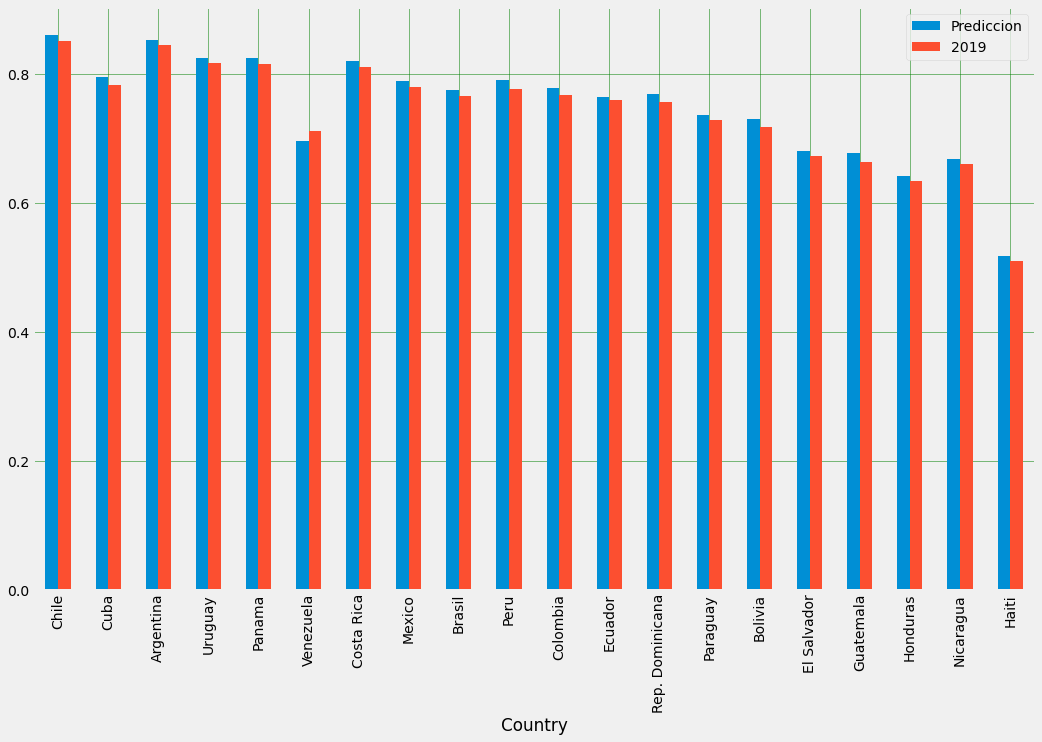

In [466]:
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()